# Notebook Purpose
This notebook contains a handful of basic visualization about our datasette requests data. 

In [1]:
import pandas as pd

from usage_metrics.resources.sqlite import get_engine

%config InlineBackend.figure_format = 'retina'

/app/.local/lib/python3.9/site-packages/dagster_pandera/__init__.py:162: ExperimentalWarning: "TableColumn" is an experimental class. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.python.org/3/library/warnings.html#describing-warning-filters.
  TableColumn(
/app/.local/lib/python3.9/site-packages/dagster_pandera/__init__.py:167: ExperimentalWarning: "TableColumn" is an experimental class. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.python.org/3/library/warnings.html#describing-warning-filters.
  TableColumn(
/app/.local/lib/python3.9/site-packages/dagster_pandera/__init__.py:172: Experimenta

In [2]:
engine = get_engine()

with engine.connect() as con:
    logs = pd.read_sql_table("data_request_logs", con)

logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51792 entries, 0 to 51791
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   insert_id               51792 non-null  object        
 1   request_method          51792 non-null  object        
 2   request_url             51792 non-null  object        
 3   request_size            51792 non-null  int64         
 4   status                  51792 non-null  int64         
 5   response_size           51788 non-null  float64       
 6   user_agent              51787 non-null  object        
 7   remote_ip               51792 non-null  object        
 8   server_ip               51792 non-null  object        
 9   referer                 1307 non-null   object        
 10  latency                 51792 non-null  float64       
 11  protocol                51792 non-null  object        
 12  log_name                51792 non-null  object

## Request Volume
Number of requests for ferc1 and pudl tables and downloads per week.

<AxesSubplot:xlabel='Week', ylabel='Number of Data Requests'>

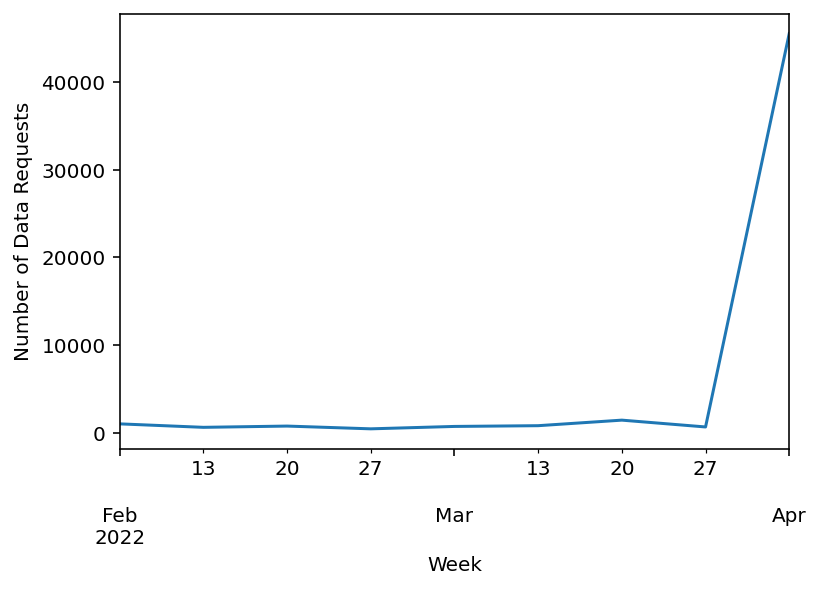

In [3]:
logs.set_index("timestamp").resample("1W").count().request_url_path.plot(xlabel="Week", ylabel="Number of Data Requests")

## Top Data Requests
The top datasette path requests. This includes json, csv and db downloads.

### Number of top data requests

<AxesSubplot:title={'center':'Requests by Data Path'}, ylabel='Number of Requests'>

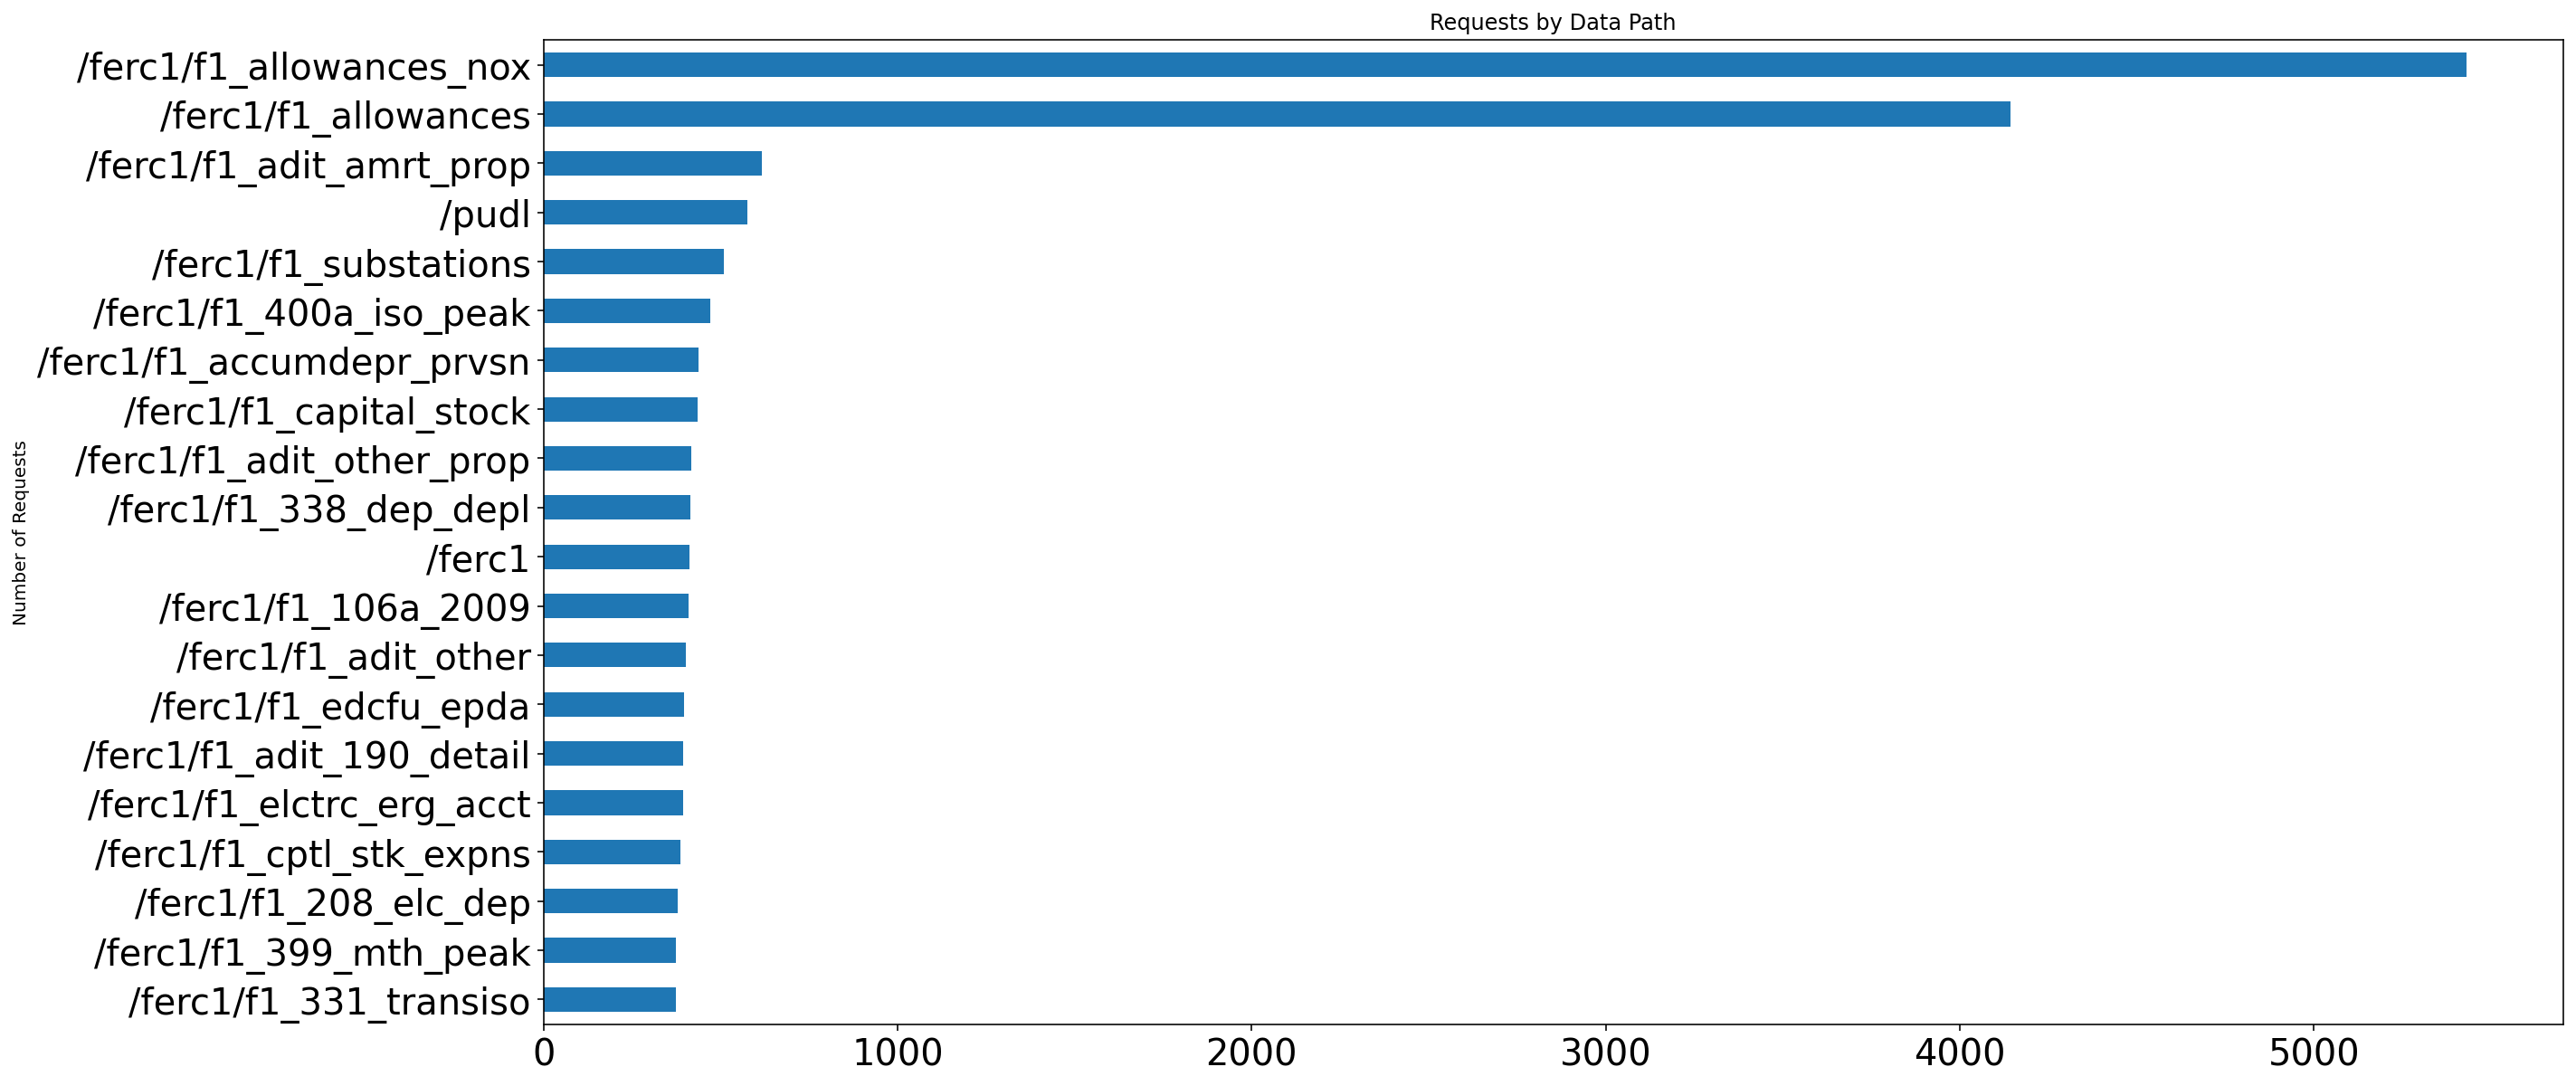

In [4]:
top_n = 20

logs.request_url_path.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by Data Path")

### Percent of all requests

This chart shows 33.55730614766759 % of all data requests.


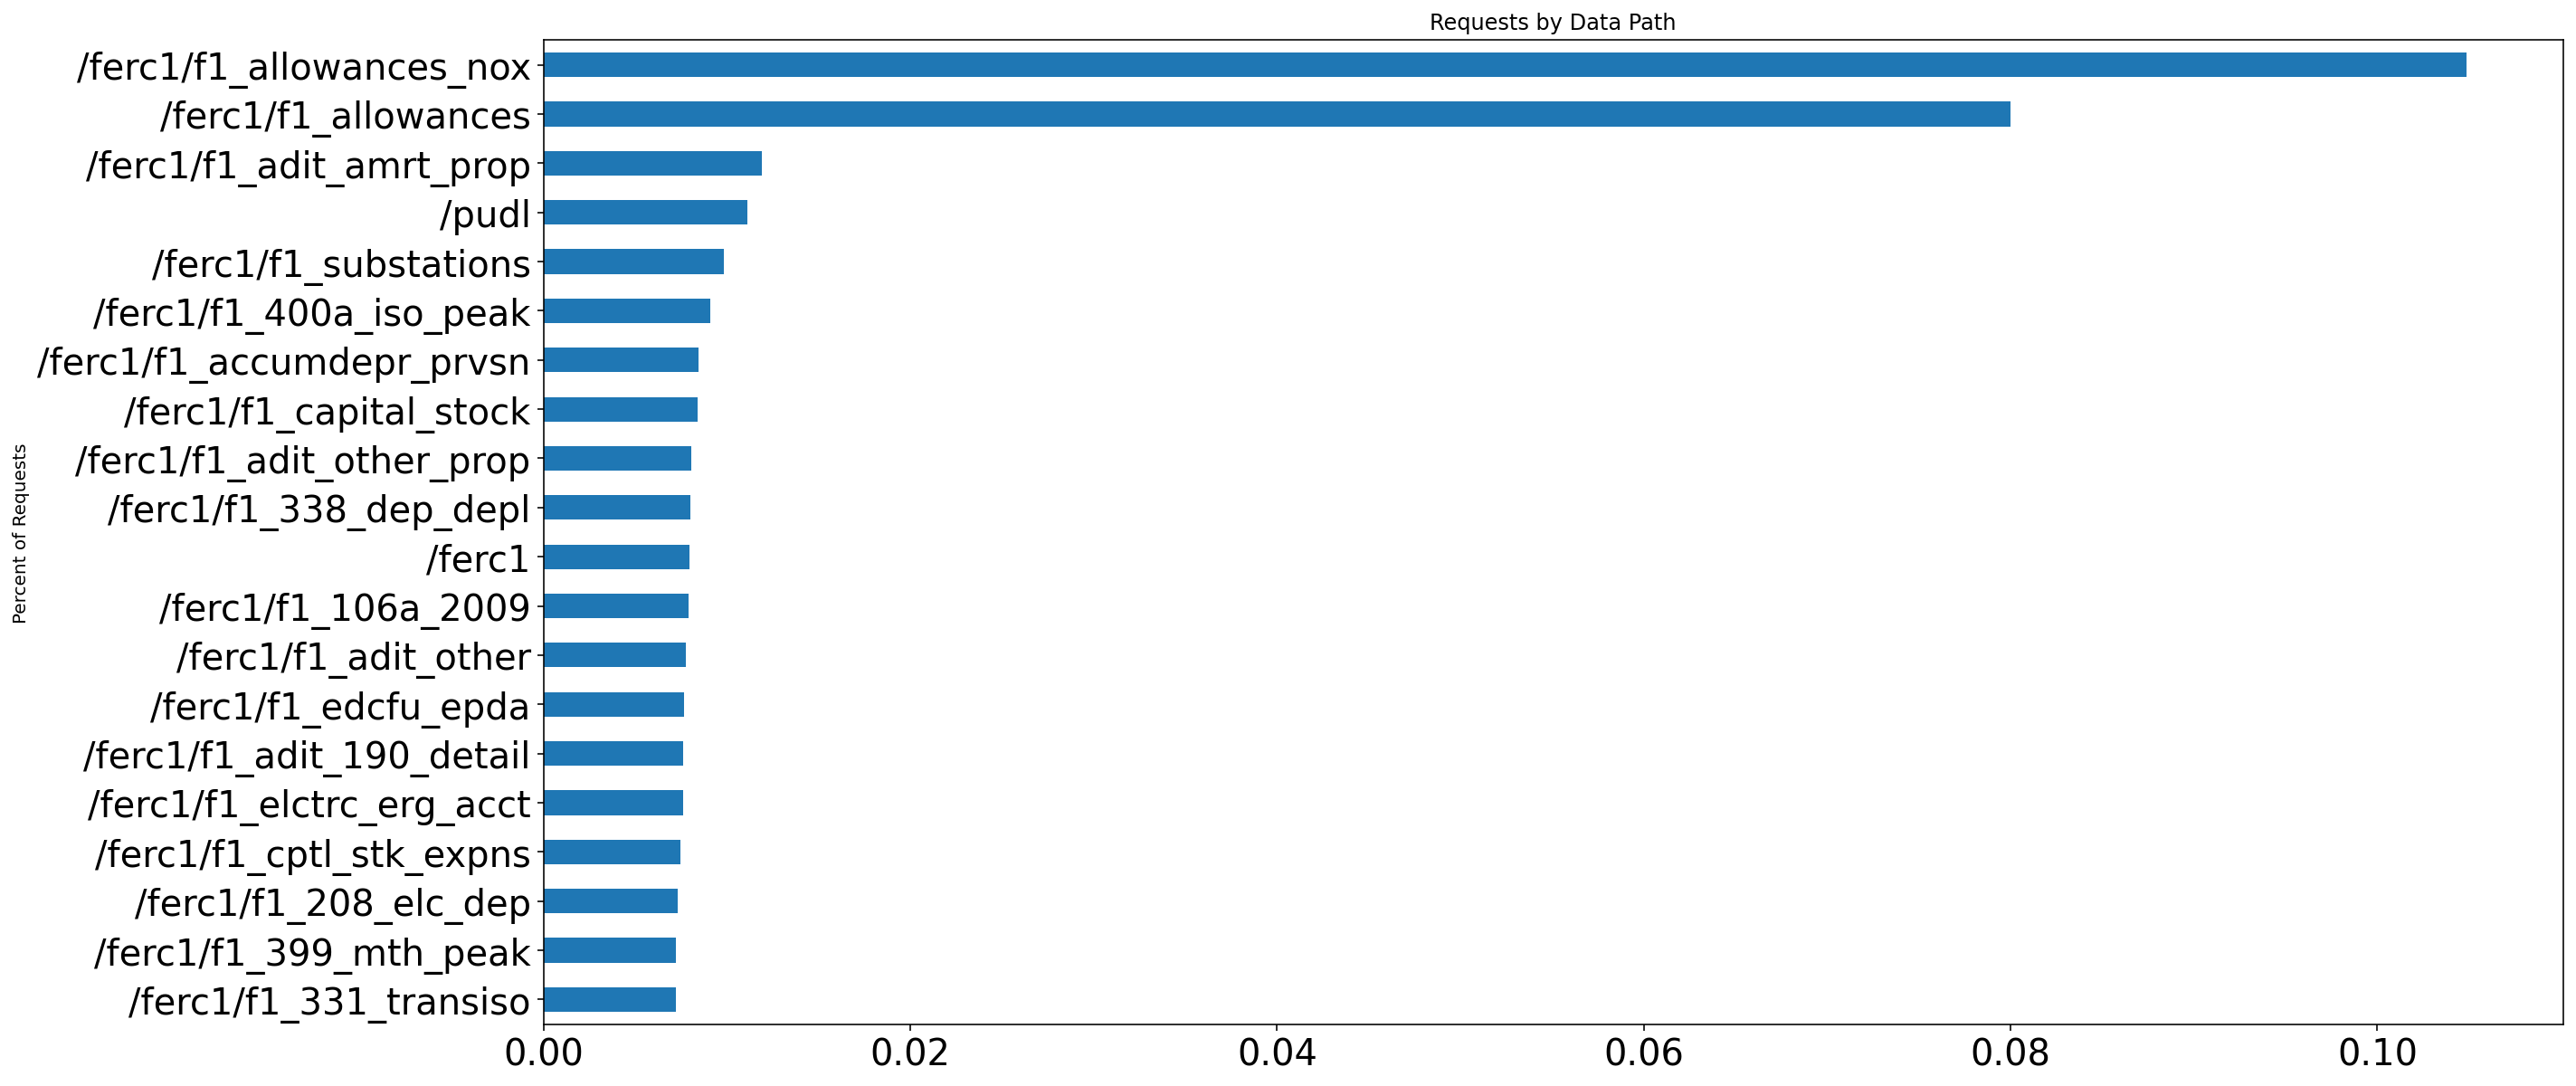

In [5]:
top_n = 20

top_paths = logs.request_url_path.value_counts(normalize=True).head(top_n)

top_paths.sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Percent of Requests", title="Requests by Data Path")

print(f"This chart shows {top_paths.sum() * 100} % of all data requests.")

## Top Organizations
Most organizations are generic internet providers however universities often have their own network set up. Unfortunately ipinfo charges for organization type so we have do some simple string filtering for now.  

<AxesSubplot:title={'center':'Requests by Academic Organization'}, ylabel='Number of Requests'>

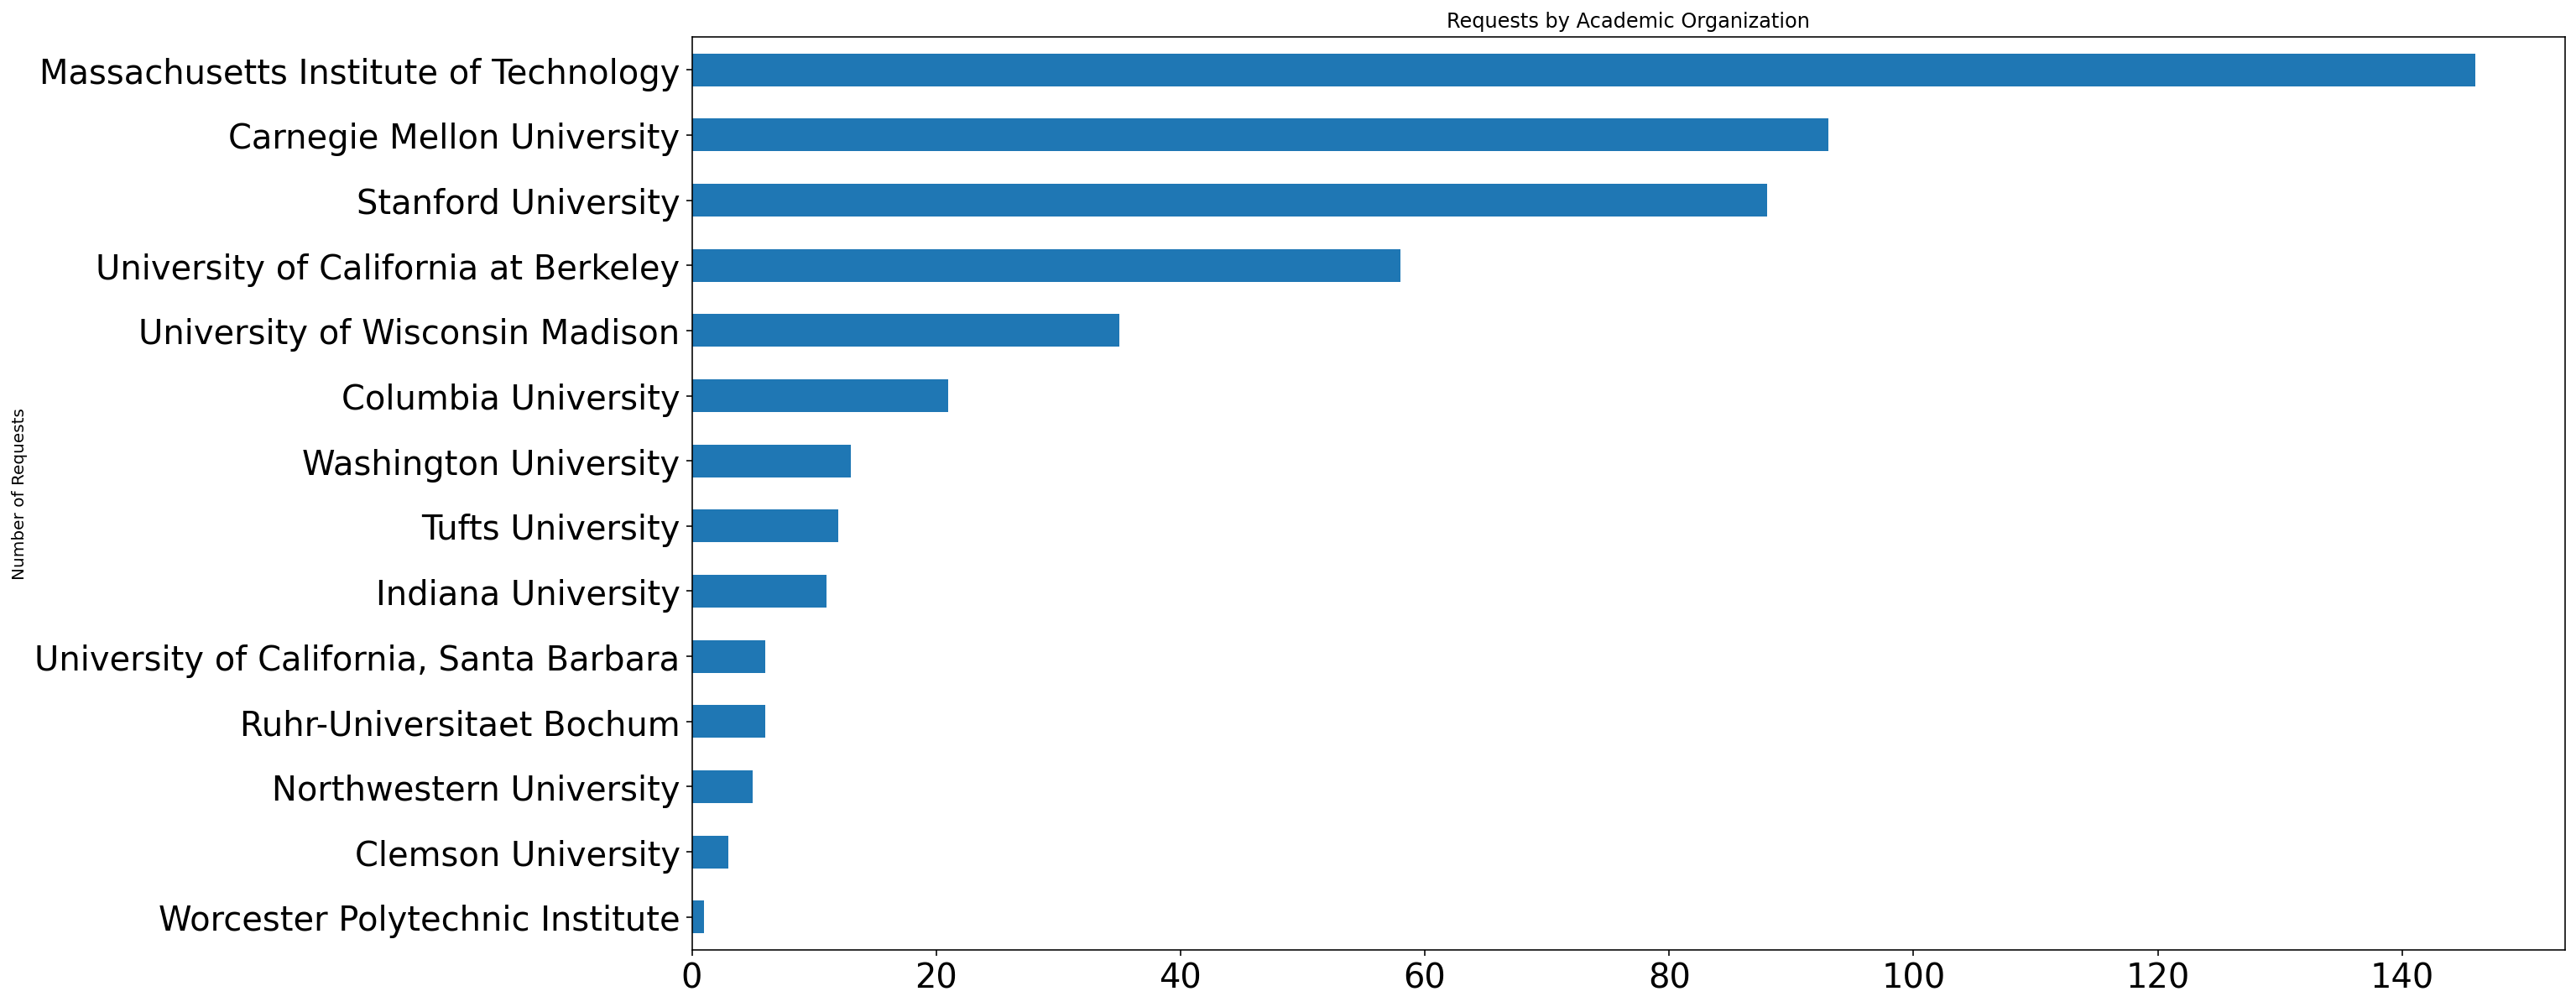

In [6]:
university_substrings = ["Universitaet", "University", "College", "Institute"]

is_uni = logs.remote_ip_org.str.contains("|".join(university_substrings))

logs[is_uni].remote_ip_org.value_counts().sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by Academic Organization")

## Top Cities

<AxesSubplot:title={'center':'Requests by City'}, ylabel='Number of Requests'>

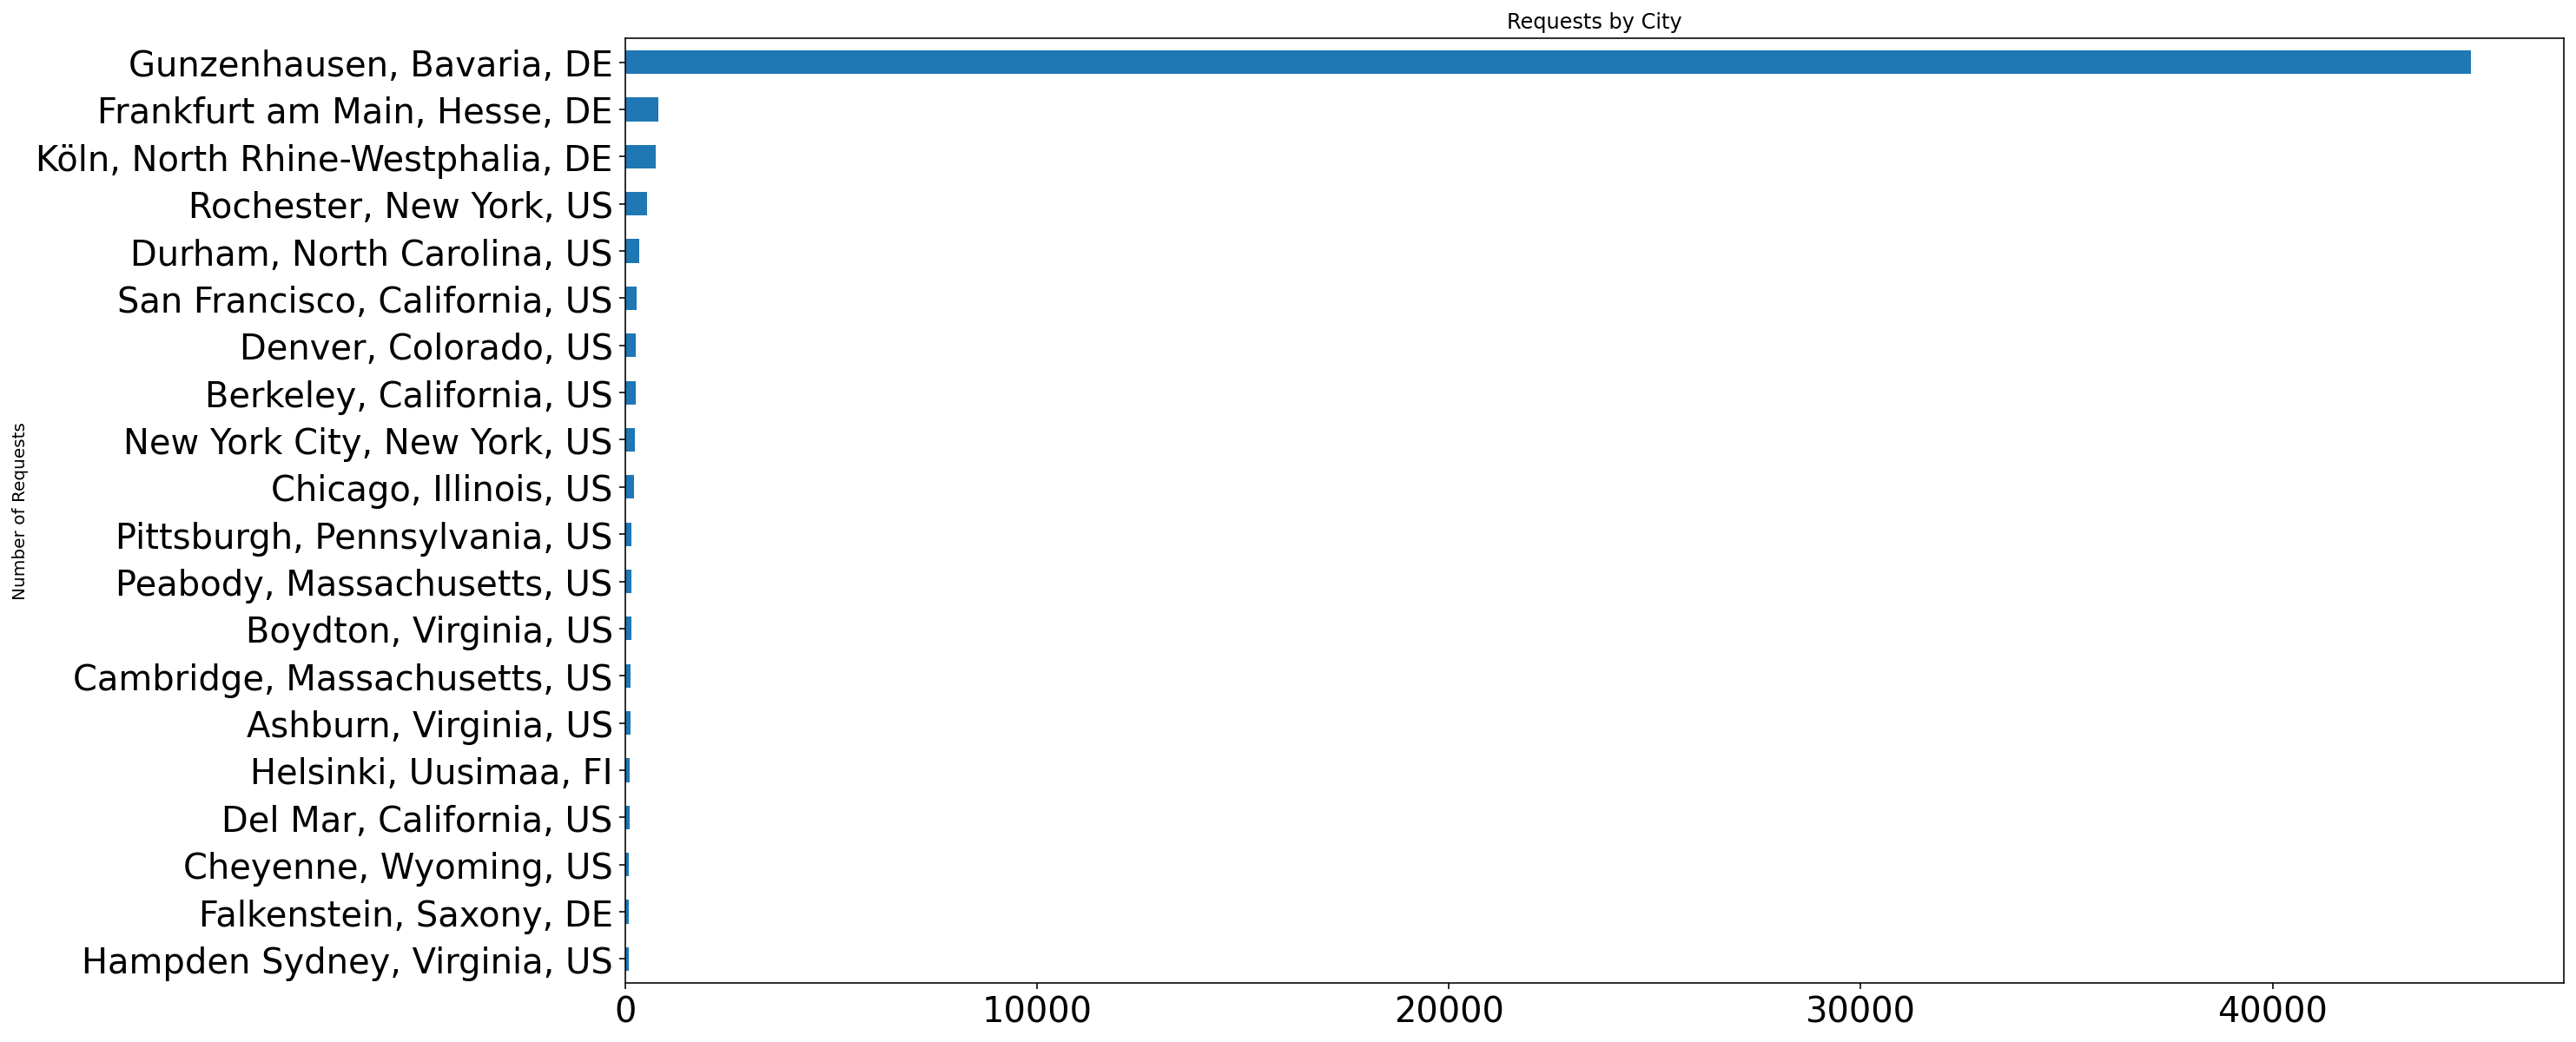

In [7]:
top_n = 20

full_location = logs.remote_ip_city + ", " + logs.remote_ip_region + ", " + logs.remote_ip_country

full_location.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by City")

## Top referers

In [8]:
logs.referer.isna().value_counts()

True     50485
False     1307
Name: referer, dtype: int64

Most referers are null.

<AxesSubplot:title={'center':'Top Referers'}, ylabel='Number of Referals'>

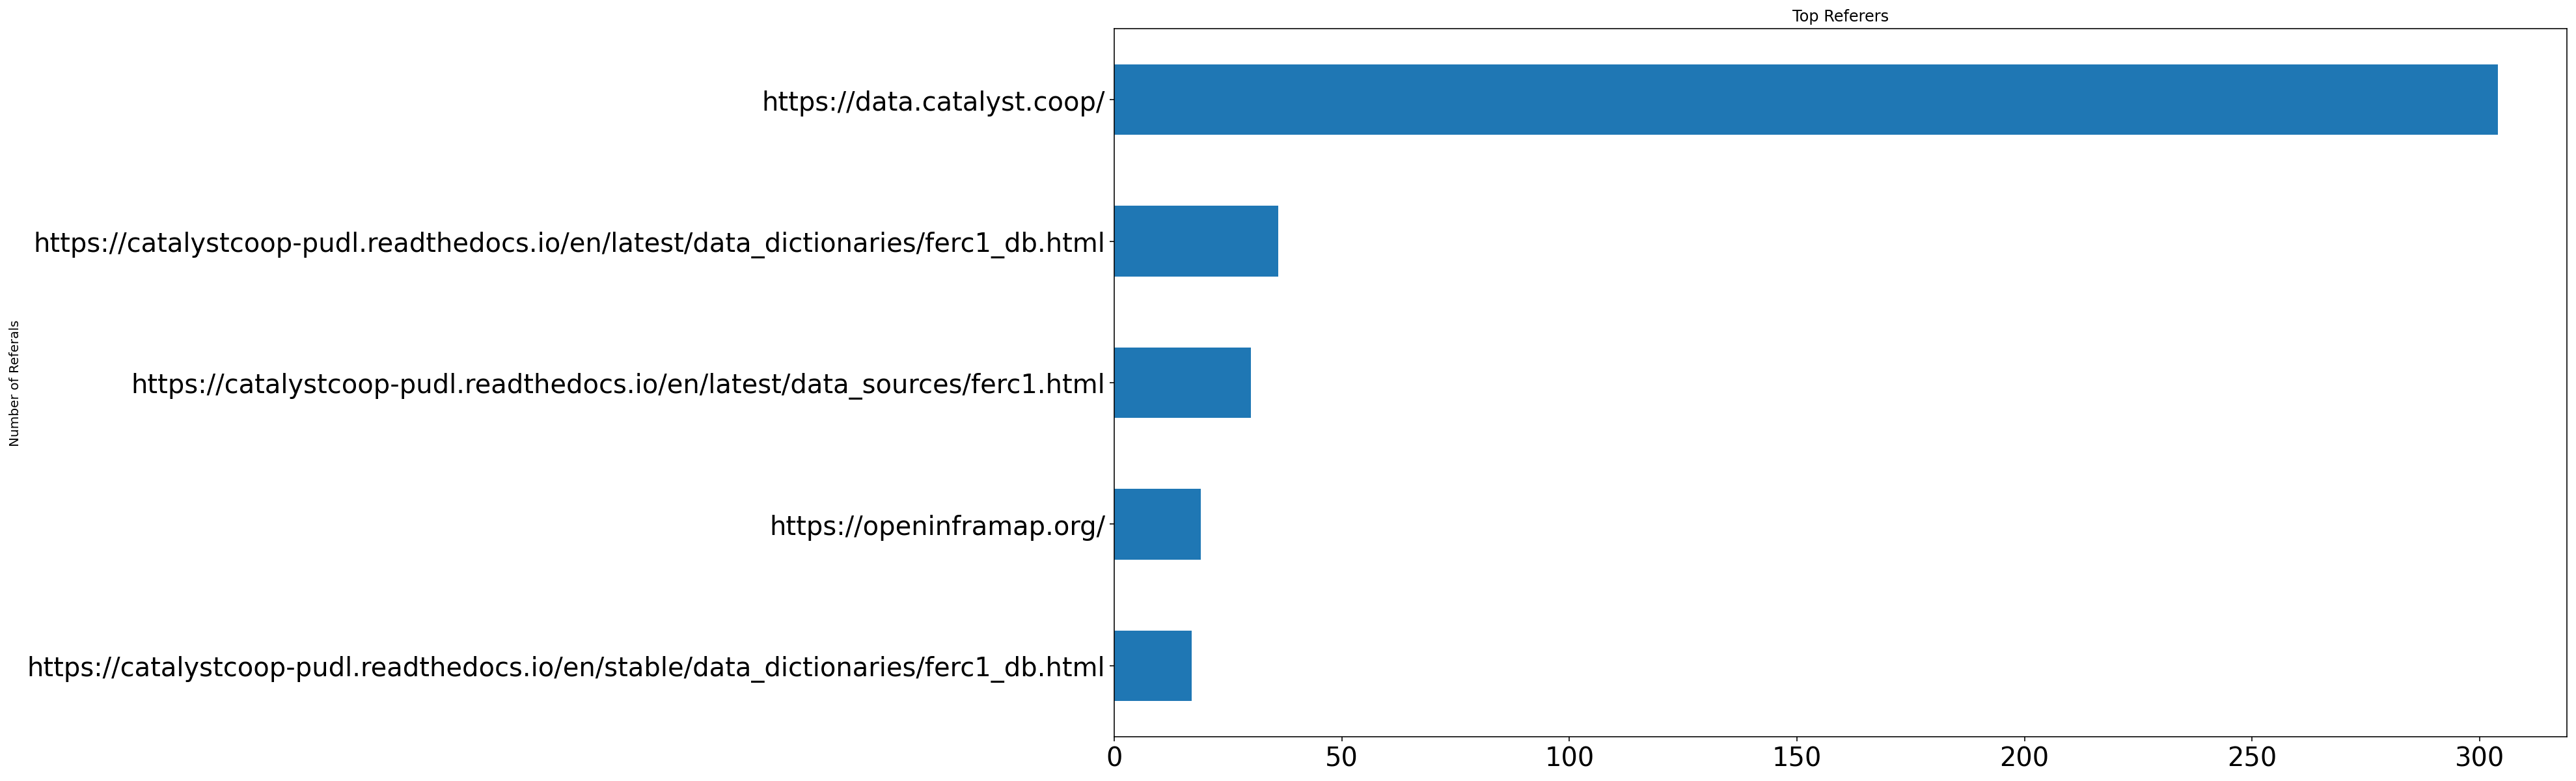

In [9]:
top_n = 5

logs.referer.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Referals", title="Top Referers")